In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

x_train = pd.read_table('Data/20210429_CRT_CCS_xtrain.txt', sep=' ', header=None)
x_train.head(10)

,0,1,2,3,4,5,6,7,8,9
0,2.0,20.0,20.0,19.0,17.0,7.0,14.0,0.0,15.0,4.0
1,17.0,18.0,16.0,18.0,0.0,10.0,10.0,7.0,15.0,4.0
2,16.0,10.0,20.0,12.0,10.0,6.0,6.0,16.0,9.0,4.0
3,9.0,3.0,17.0,16.0,2.0,3.0,0.0,15.0,10.0,4.0
4,9.0,8.0,8.0,16.0,2.0,12.0,10.0,17.0,20.0,1.0
5,10.0,12.0,20.0,14.0,17.0,13.0,6.0,11.0,15.0,4.0
6,9.0,10.0,18.0,18.0,14.0,15.0,10.0,3.0,4.0,4.0
7,9.0,10.0,3.0,0.0,2.0,8.0,15.0,3.0,3.0,4.0
8,20.0,11.0,2.0,8.0,3.0,5.0,2.0,5.0,9.0,4.0
9,8.0,7.0,10.0,18.0,12.0,10.0,17.0,6.0,10.0,9.0


In [3]:
input_dict = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'END': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12,
 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}

placeholder_index = 4

In [4]:
y_train = pd.read_table('Data/20210429_CRT_CCS_ytrain.txt', sep=' ', header=None)
y_train.head(10)

,0
0,383.953401
1,341.274295
2,322.671530
3,324.313845
4,372.615619
5,364.047872
6,338.322664
7,350.276053
8,376.608364
9,375.715414


In [5]:
x_train.shape, y_train.shape

((33134, 10), (33134, 1))

In [6]:
x_val = pd.read_table('Data/20210429_CRT_CCS_xval.txt', sep=' ', header=None)
y_val = pd.read_table('Data/20210429_CRT_CCS_yval.txt', sep=' ', header=None)

In [27]:
import xgboost as xg

clf = xg.XGBRegressor(objective ='reg:squarederror')
%time clf.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=True)

[0]	validation_0-rmse:22.91692
[1]	validation_0-rmse:21.77781
[2]	validation_0-rmse:21.11724
[3]	validation_0-rmse:20.64302
[4]	validation_0-rmse:20.29720
[5]	validation_0-rmse:20.10476
[6]	validation_0-rmse:19.88905
[7]	validation_0-rmse:19.72830
[8]	validation_0-rmse:19.46524
[9]	validation_0-rmse:19.34541
[10]	validation_0-rmse:19.03038
[11]	validation_0-rmse:18.88278
[12]	validation_0-rmse:18.65763
[13]	validation_0-rmse:18.48556
[14]	validation_0-rmse:18.32751
[15]	validation_0-rmse:18.22911
[16]	validation_0-rmse:18.09446
[17]	validation_0-rmse:17.91518
[18]	validation_0-rmse:17.71851
[19]	validation_0-rmse:17.56979
[20]	validation_0-rmse:17.31221
[21]	validation_0-rmse:17.15441
[22]	validation_0-rmse:16.98170
[23]	validation_0-rmse:16.83832
[24]	validation_0-rmse:16.77027
[25]	validation_0-rmse:16.70011
[26]	validation_0-rmse:16.65483
[27]	validation_0-rmse:16.54723
[28]	validation_0-rmse:16.47412
[29]	validation_0-rmse:16.33360
[30]	validation_0-rmse:16.21752
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xg

multioutputregressor = MultiOutputRegressor(xg.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05867262382966536,
    max_depth=7,
    subsample=1,
    colsample_bytree=0.5,
    )).fit(x_train, y_train)

In [32]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xg
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_spaces = {
    'estimator__n_estimators': Integer(100, 2000),
    'estimator__learning_rate': Real(0.001, 0.1, 'log-uniform'),
}

multioutputregressor = MultiOutputRegressor(xg.XGBRegressor(objective='reg:squarederror', optimizer='RMS Prop'))
clf = xg.XGBRegressor(objective ='reg:squarederror')

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=clf,
    search_spaces=search_spaces,
    n_iter=100,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation,
    scoring='neg_mean_squared_error',
)

bayes_search.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=True)

[0]	validation_0-rmse:22.91323
[1]	validation_0-rmse:21.75977
[2]	validation_0-rmse:21.05817
[3]	validation_0-rmse:20.62246
[4]	validation_0-rmse:20.35826
[5]	validation_0-rmse:20.12049
[6]	validation_0-rmse:19.91013
[7]	validation_0-rmse:19.74425
[8]	validation_0-rmse:19.44477
[9]	validation_0-rmse:19.19358
[10]	validation_0-rmse:19.00277
[11]	validation_0-rmse:18.89644
[12]	validation_0-rmse:18.66758
[13]	validation_0-rmse:18.44324
[14]	validation_0-rmse:18.35747
[15]	validation_0-rmse:18.11738
[16]	validation_0-rmse:18.02476
[17]	validation_0-rmse:17.87270
[18]	validation_0-rmse:17.70560
[19]	validation_0-rmse:17.62184
[20]	validation_0-rmse:17.52258
[21]	validation_0-rmse:17.41393
[22]	validation_0-rmse:17.27235
[23]	validation_0-rmse:17.13305
[24]	validation_0-rmse:16.98161
[25]	validation_0-rmse:16.92142
[26]	validation_0-rmse:16.79254
[27]	validation_0-rmse:16.74490
[28]	validation_0-rmse:16.71936
[29]	validation_0-rmse:16.59888
[30]	validation_0-rmse:16.54071
[31]	validation_0-

BayesSearchCV(cv=3,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
              n_iter=100, scoring='neg_mean_squared_error',
              search_spaces={'estimator__learning_rate': Real(low=0.001, high=0.1, prior='log-uniform', transform='normalize'),
                             'estimator__n_estimators': Integer(low=100, high=2000, prior='uniform', transform='normalize')})

In [11]:
bayes_search.best_params_

OrderedDict([('estimator__colsample_bytree', 0.9600403046509786),
             ('estimator__learning_rate', 0.0945416507205228),
             ('estimator__max_depth', 8),
             ('estimator__n_estimators', 1674),
             ('estimator__subsample', 0.3550437142634394)])

In [33]:
model = bayes_search.best_estimator_

In [39]:
model.save_model("Model/XGBoost_CRT_CCS.model")

In [9]:
import xgboost as xg

model = xg.XGBRegressor()
model.load_model("Model/XGBoost_CRT_CCS.model")

In [7]:
x_test = pd.read_table('Data/20210429_CRT_CCS_xtest.txt', sep=' ', header=None)
y_test = pd.read_table('Data/20210429_CRT_CCS_ytest.txt', sep=' ', header=None)

In [11]:
print(np.mean((multioutputregressor.predict(x_test) - y_test)**2, axis=0))

0    0.056008
1    0.119083
2    0.203210
3    0.124103
4    0.049307
dtype: float64


In [10]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, index=x_test.index)
new_y_test = pd.DataFrame(y_test, index=x_test.index)

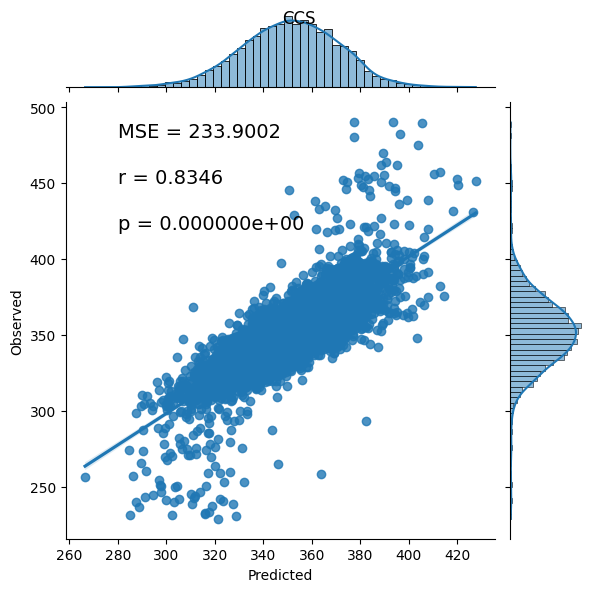

In [11]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

jp = sns.jointplot(x=y_pred.iloc[:, 0], y=new_y_test.iloc[:, 0], kind='reg')
jp.fig.suptitle('CCS')
jp.ax_joint.set_xlabel('Predicted')
jp.ax_joint.set_ylabel('Observed')
prCor, pCor = spearmanr(y_pred, new_y_test)
mse = round(mean_squared_error(y_pred, new_y_test),4)
jp.ax_joint.text(280, 480,"MSE = " + str(mse), fontsize=14)
jp.ax_joint.text(280,450,"r = " + str(round(prCor,4)), fontsize=14)
jp.ax_joint.text(280, 420,"p = " + "{:e}".format(pCor), fontsize=14)

# # Set the figure size
# jp.figure.set_size_inches(0.001, 0.25)

plt.show()

In [16]:
intensity = 0

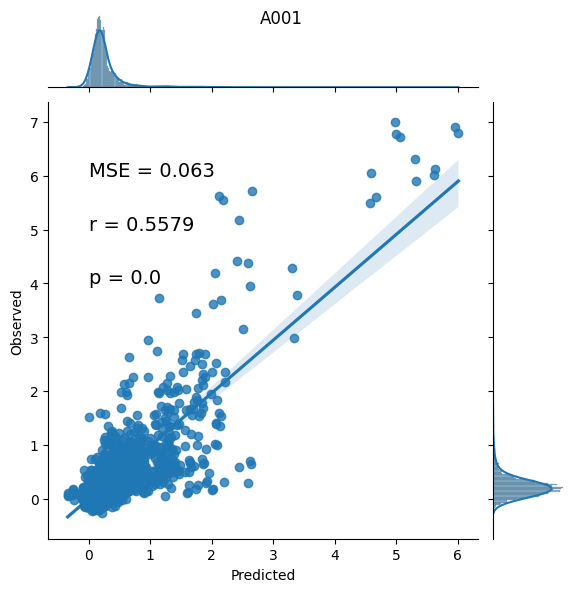

In [17]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

jp = sns.jointplot(x=y_pred.iloc[:, intensity], y=y_test.iloc[:, intensity], kind='reg')
jp.fig.suptitle('A001')
jp.ax_joint.set_xlabel('Predicted')
jp.ax_joint.set_ylabel('Observed')
prCor, pCor = spearmanr(y_pred.iloc[:, intensity], y_test.iloc[:, intensity])
mse = round(mean_squared_error(y_pred.iloc[:, intensity], y_test.iloc[:, intensity]),4)
jp.ax_joint.text(0,6,"MSE = " + str(mse), fontsize=14)
jp.ax_joint.text(0,5,"r = " + str(round(prCor,4)), fontsize=14)
jp.ax_joint.text(0,4,"p = " + str(pCor), fontsize=14)
plt.show()

In [12]:
import shap
shap.initjs()

In [48]:
def xgb_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray)
    return model.predict(data_asframe)

In [49]:
samp = shap.kmeans(x_train, 100)
explainer = shap.KernelExplainer(xgb_predict, samp)

In [50]:
shap_values = explainer.shap_values(X=x_test, nsamples=298, silent=True)

In [33]:
np.save('Poshap/XGBoost_CRT_CCS_SHAP.npy', shap_values)

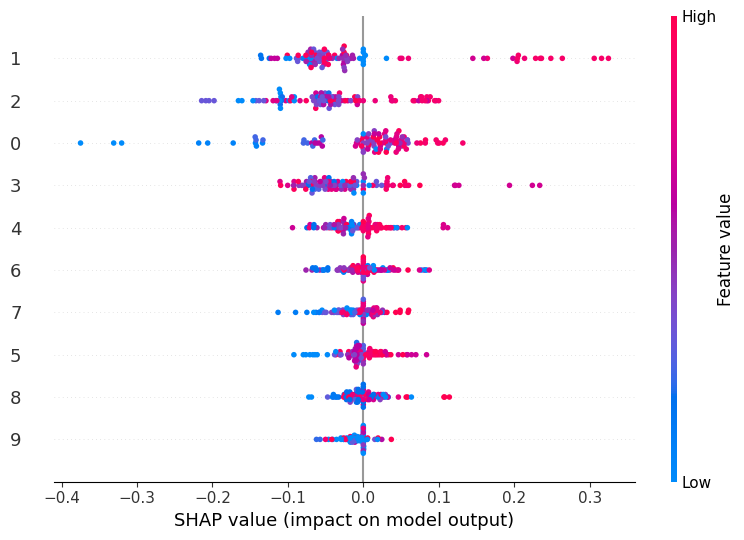

In [15]:
shap.initjs()

shap.summary_plot(shap_values=shap_values[:, :, intensity], features=x_test.iloc[0:100, :], title='A001 SHAP by position')

In [16]:
shap.initjs()

input_array = [list(input_dict.keys())[int(key)] for key in x_test.iloc[0]]
print(''.join(input_array))

shap.force_plot(
    base_value=explainer.expected_value[intensity],
    shap_values=shap_values[0][:, intensity],
    features=x_test.iloc[0 : 0 + 1, :],
)

KMTLTEEVENDEND


,0,1,2,3,4,5,6,7,8,9
0,7.0,10.0,2.0,15.0,13.0,18.0,5.0,10.0,15.0,4.0
1,10.0,5.0,12.0,3.0,7.0,8.0,3.0,15.0,4.0,4.0
2,9.0,3.0,14.0,0.0,10.0,14.0,10.0,0.0,14.0,4.0
3,9.0,3.0,14.0,0.0,10.0,14.0,10.0,0.0,14.0,9.0
4,18.0,2.0,17.0,14.0,2.0,14.0,6.0,11.0,20.0,15.0


In [51]:
%%capture
# Recalculate PoSHAP for dependency analysis

pos = [[[] for _ in range(21)] for _ in range(10)]

for i in range(x_test.shape[0]):
    input_array = [list(input_dict.keys())[int(key)] for key in x_test.iloc[i]]
    pos_index = 0
    for value in shap_values[i, :]:
        pos[pos_index][input_dict.get(input_array[pos_index])].append(value)
        pos_index += 1

In [52]:
poshap_ccs = [[np.mean(value) if len(value) > 0 else 0 for value in pos[i]] for i in range(10)]
count_ccs = [[len(value) for value in pos[i]] for i in range(10)]

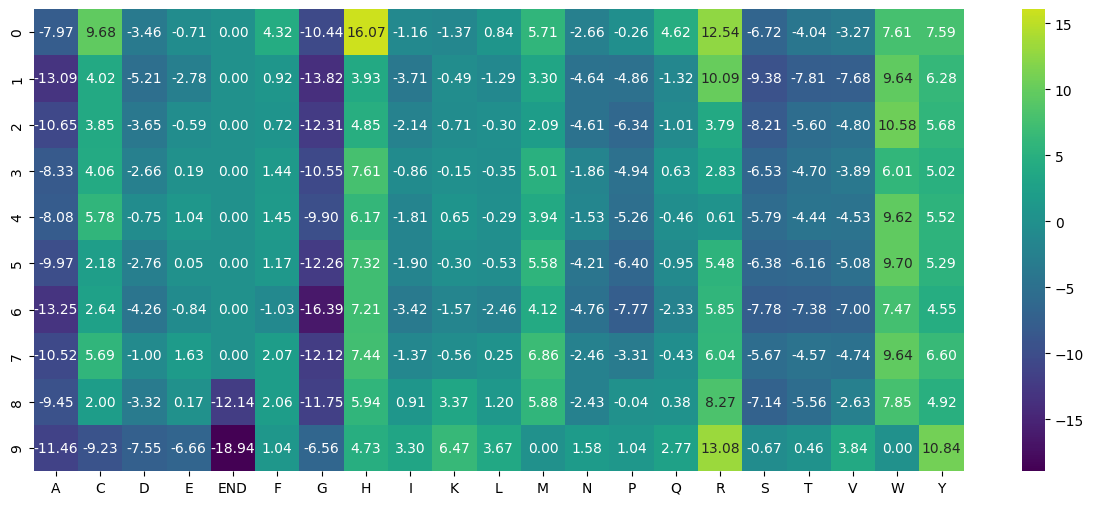

In [54]:
plt.figure(figsize=(15, 6))
ax = sns.heatmap(poshap_ccs, cmap='viridis', center=0, annot=True, fmt= '.2f')

current_labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [list(input_dict.keys())[int(label)] for label in current_labels]
ax.set_xticklabels(new_labels)

plt.show()

In [71]:
# Dependency analysis


# Divide 2 group

first_aa = [[[[[] for _ in range(10)] for _ in range(21)] for _ in range(21)] for _ in range(10)]
compare_aa = [[[[[] for _ in range(10)] for _ in range(21)] for _ in range(21)] for _ in range(10)]

for f_pos in range(10):
    for f_aa in range(21):
        if f_aa != placeholder_index:   
            for c_pos in range(10):
                if f_pos != c_pos:
                    for c_aa in range(21):
                        if c_aa != placeholder_index:
                            for i in range(x_test.shape[0]):
                                if x_test.iloc[i, f_pos] == f_aa and x_test.iloc[i, c_pos] == c_aa:
                                    first_aa[f_pos][f_aa][c_aa][c_pos].append(shap_values[i, f_pos])
                                if x_test.iloc[i, f_pos] == f_aa and x_test.iloc[i, c_pos] != c_aa:
                                    compare_aa[f_pos][f_aa][c_aa][c_pos].append(shap_values[i, f_pos])
                        

In [72]:
np.save('Dep/XG_CCS_firstdep.npy', pd.DataFrame(first_aa).to_numpy())
np.save('Dep/XG_CCS_comdep.npy', pd.DataFrame(compare_aa).to_numpy())

In [4]:
first_aa = np.load('Dep/XG_CCS_firstdep.npy', allow_pickle=True)
compare_aa = np.load('Dep/XG_CCS_comdep.npy', allow_pickle=True)

In [5]:
from scipy.stats import mannwhitneyu

output = []

for f_pos in range(len(first_aa)):
    for f_aa in range(len(first_aa[f_pos])):
        for c_aa in range(len(first_aa[f_pos][f_aa])):
            for c_pos in range(len(first_aa[f_pos][f_aa][c_aa])):
                try:
                    stat, test = mannwhitneyu(first_aa[f_pos][f_aa][c_aa][c_pos], compare_aa[f_pos][f_aa][c_aa][c_pos])
                except ValueError:
                    stat = 1
                    test = 1
                if test < 1 and test > 0:
                    output.append([test, list(input_dict.keys())[f_aa], f_pos + 1, c_pos + 1, list(input_dict.keys())[c_aa], len(first_aa[f_pos][f_aa][c_aa][c_pos]), len(compare_aa[f_pos][f_aa][c_aa][c_pos]), np.mean(first_aa[f_pos][f_aa][c_aa][c_pos]) - np.mean(compare_aa[f_pos][f_aa][c_aa][c_pos])])
                    


In [6]:
output = pd.DataFrame(output, columns=['p-val', 'aa', 'pos', 'compare pos', 'compare aa', 'compare size', 'total size', 'absolute mean shap'])

In [7]:
from statsmodels.stats import multitest
corr_pval = multitest.multipletests(output['p-val'].tolist(), alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
output.insert(1, 'corr p-val', corr_pval[1])
output

,p-val,corr p-val,aa,pos,compare pos,compare aa,compare size,total size,absolute mean shap
0,0.425539,1.0,A,1,2,A,24,219,0.524176
1,0.022137,1.0,A,1,3,A,28,215,-0.765137
2,0.760291,1.0,A,1,4,A,11,232,-0.046542
3,0.758152,1.0,A,1,5,A,25,218,-0.102570
4,0.889914,1.0,A,1,6,A,15,228,-0.217299
...,...,...,...,...,...,...,...,...,...
28753,0.641026,1.0,Y,10,9,V,2,11,2.178965
28754,0.461538,1.0,Y,10,5,W,1,12,1.381805
28755,0.923077,1.0,Y,10,3,Y,1,12,-0.532968
28756,0.153846,1.0,Y,10,4,Y,1,12,-2.350512


In [8]:
kind_dict = {'A': 'Hydrophobic', 'C': 'Hydrophobic', 'D': 'Negative', 'E': 'Negative', 'END': 'End', 'F': 'Hydrophobic', 'G': 'Hydrophobic', 'H': 'Positive', 'I': 'Hydrophobic', 'K': 'Positive', 'L': 'Hydrophobic', 'M': 'Hydrophobic', 'N': 'Polar',
 'P': 'Hydrophobic', 'Q': 'Polar', 'R': 'Positive', 'S': 'Polar', 'T': 'Polar', 'V': 'Hydrophobic', 'W': 'Hydrophobic', 'Y': 'Hydrophobic'}

def determine_kind(row):
    aa_kind = kind_dict[row['aa']]
    compare_aa_kind = kind_dict[row['compare aa']]
    
    if aa_kind == compare_aa_kind and (aa_kind == 'Positive' or aa_kind == 'Negative'):
        return 'Charge Repulsion'
    elif (aa_kind == 'Positive' and compare_aa_kind == 'Negative') or (aa_kind == 'Negative' and compare_aa_kind == 'Positive'):
        return 'Charge Attraction'
    elif (aa_kind == 'Polar' or compare_aa_kind == 'Polar') and (aa_kind == 'Positive' or compare_aa_kind == 'Positive' or aa_kind == 'Negative' or compare_aa_kind == 'Negative'):
        return 'Polar'
    else:
        return 'Other'
    
def determine_kind_distance(row):
    kind = row['kind']
    if row['distance'] == 1:
        return kind + '-Neighbor'
    elif 2 <= row['distance'] <= 6:
        return kind + '-Near'
    else:
        return kind + '-Far'

In [9]:
output_below = output.loc[output['corr p-val'] <= 0.05]
output_below.sort_values(by='corr p-val', ascending=True)
output_below['distance'] = abs(output_below['pos'] - output_below['compare pos'])
output_below['kind'] = output_below.apply(determine_kind, axis=1)
output_below['kind-distance'] = output_below.apply(determine_kind_distance, axis=1)

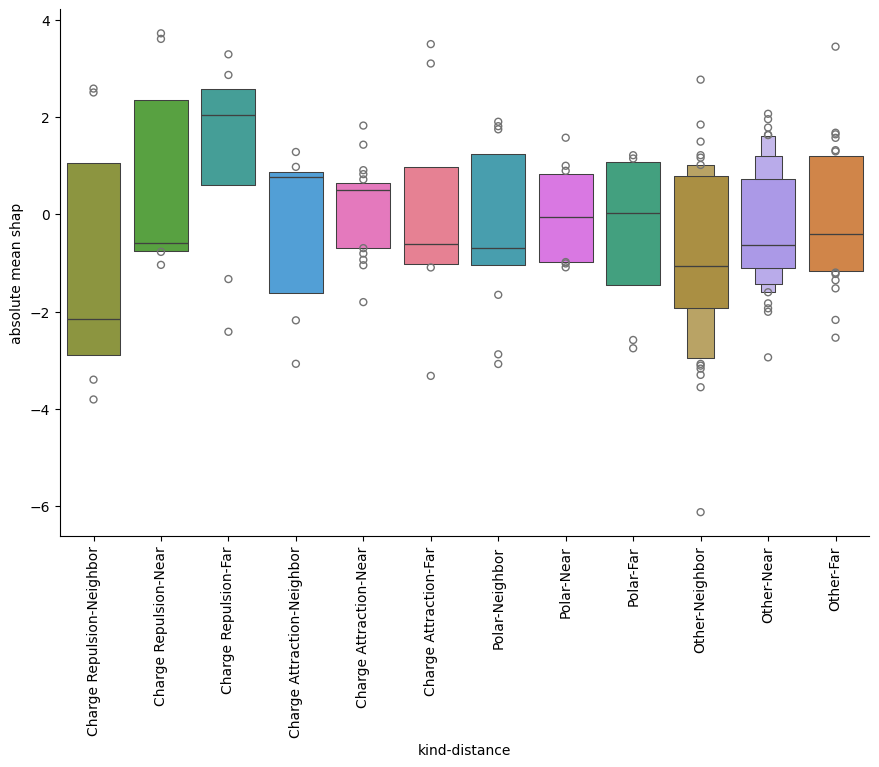

In [14]:
ax = sns.catplot(data=output_below, x='kind-distance', y='absolute mean shap', kind='boxen', legend=False, hue='kind-distance', palette='husl', height=6, aspect=1.5,
                 order=[
                     'Charge Repulsion-Neighbor', 'Charge Repulsion-Near', 'Charge Repulsion-Far',
                        'Charge Attraction-Neighbor', 'Charge Attraction-Near', 'Charge Attraction-Far',
                        'Polar-Neighbor', 'Polar-Near', 'Polar-Far',
                        'Other-Neighbor', 'Other-Near', 'Other-Far'
                 ])
ax.set_xticklabels(rotation=90)
plt.show()

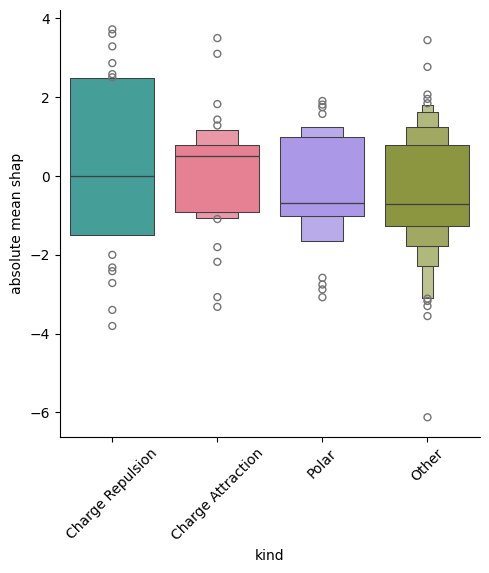

In [11]:
ax = sns.catplot(data=output_below, x='kind', y='absolute mean shap', kind='boxen', legend=False, hue='kind', palette='husl', order=['Charge Repulsion', 'Charge Attraction', 'Polar', 'Other'])
ax.set_xticklabels(rotation=45)

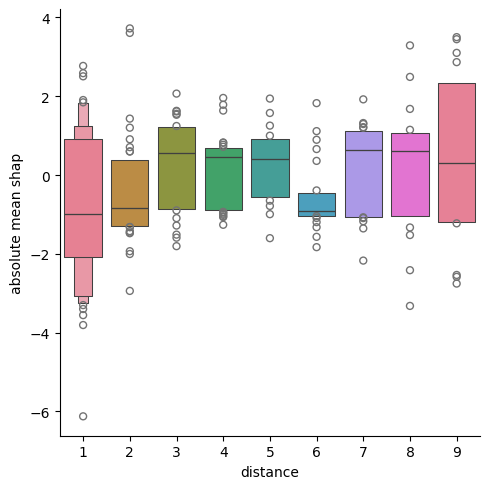

In [12]:
sns.catplot(data=output_below, x='distance', y='absolute mean shap', kind='boxen', legend=False, hue='distance', palette='husl')